In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('heart.csv')
df.head()
# df.value_counts()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
print(df.output.value_counts())

output
1    165
0    138
Name: count, dtype: int64


## Pre Processing Data
First of all i saved all colomns name in cols variable in order to access x and y easier.<br>
All colomns except "output" considered as features and should be used to train data set and then predict y with it, x and y should be
changed from pandas dataframe to numpy array. Not reshaping y will result error in train_test_split function.<br>
Next i scale x in normal curve. Bare in mind that becuse y is a label must not be scaled and standarizing it will resulst unexpected values. <br>
Then i split data set into train and test with proportion of 30% to 70 with random state 0 which will be use same randomness each time. In upcoming 
sections this excact random state will be reused in cross validation too.<br>
np.reval prevent errors in model training procces.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cols = df.columns
x = df[cols[:len(cols)-1]]
x = np.asarray(x)
y = df[cols[len(cols)-1]]
y = np.asarray(y).reshape(-1, 1)

scalerX = StandardScaler().fit(x)
x = scalerX.transform(x)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

y = np.ravel(y)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

print(x[0:5])
print(y[0:5])

[[ 0.9521966   0.68100522  1.97312292  0.76395577 -0.25633371  2.394438
  -1.00583187  0.01544279 -0.69663055  1.08733806 -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 -0.09273778  0.07219949 -0.41763453
   0.89896224  1.63347147 -0.69663055  2.12257273 -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 -0.09273778 -0.81677269 -0.41763453
  -1.00583187  0.97751389 -0.69663055  0.31091206  0.97635214 -0.71442887
  -0.51292188]
 [ 0.18017482  0.68100522  0.03203122 -0.66386682 -0.19835726 -0.41763453
   0.89896224  1.23989692 -0.69663055 -0.20670527  0.97635214 -0.71442887
  -0.51292188]
 [ 0.29046364 -1.46841752 -0.93851463 -0.66386682  2.08204965 -0.41763453
   0.89896224  0.58393935  1.43548113 -0.37924438  0.97635214 -0.71442887
  -0.51292188]]
[1 1 1 1 1]


### First Look
It is possible that y have some obvious relationships to x so i plot each continues feature in front of each in pairs and color 0 and 1 outputs with
diffrent colors so that this simple relationships show up.

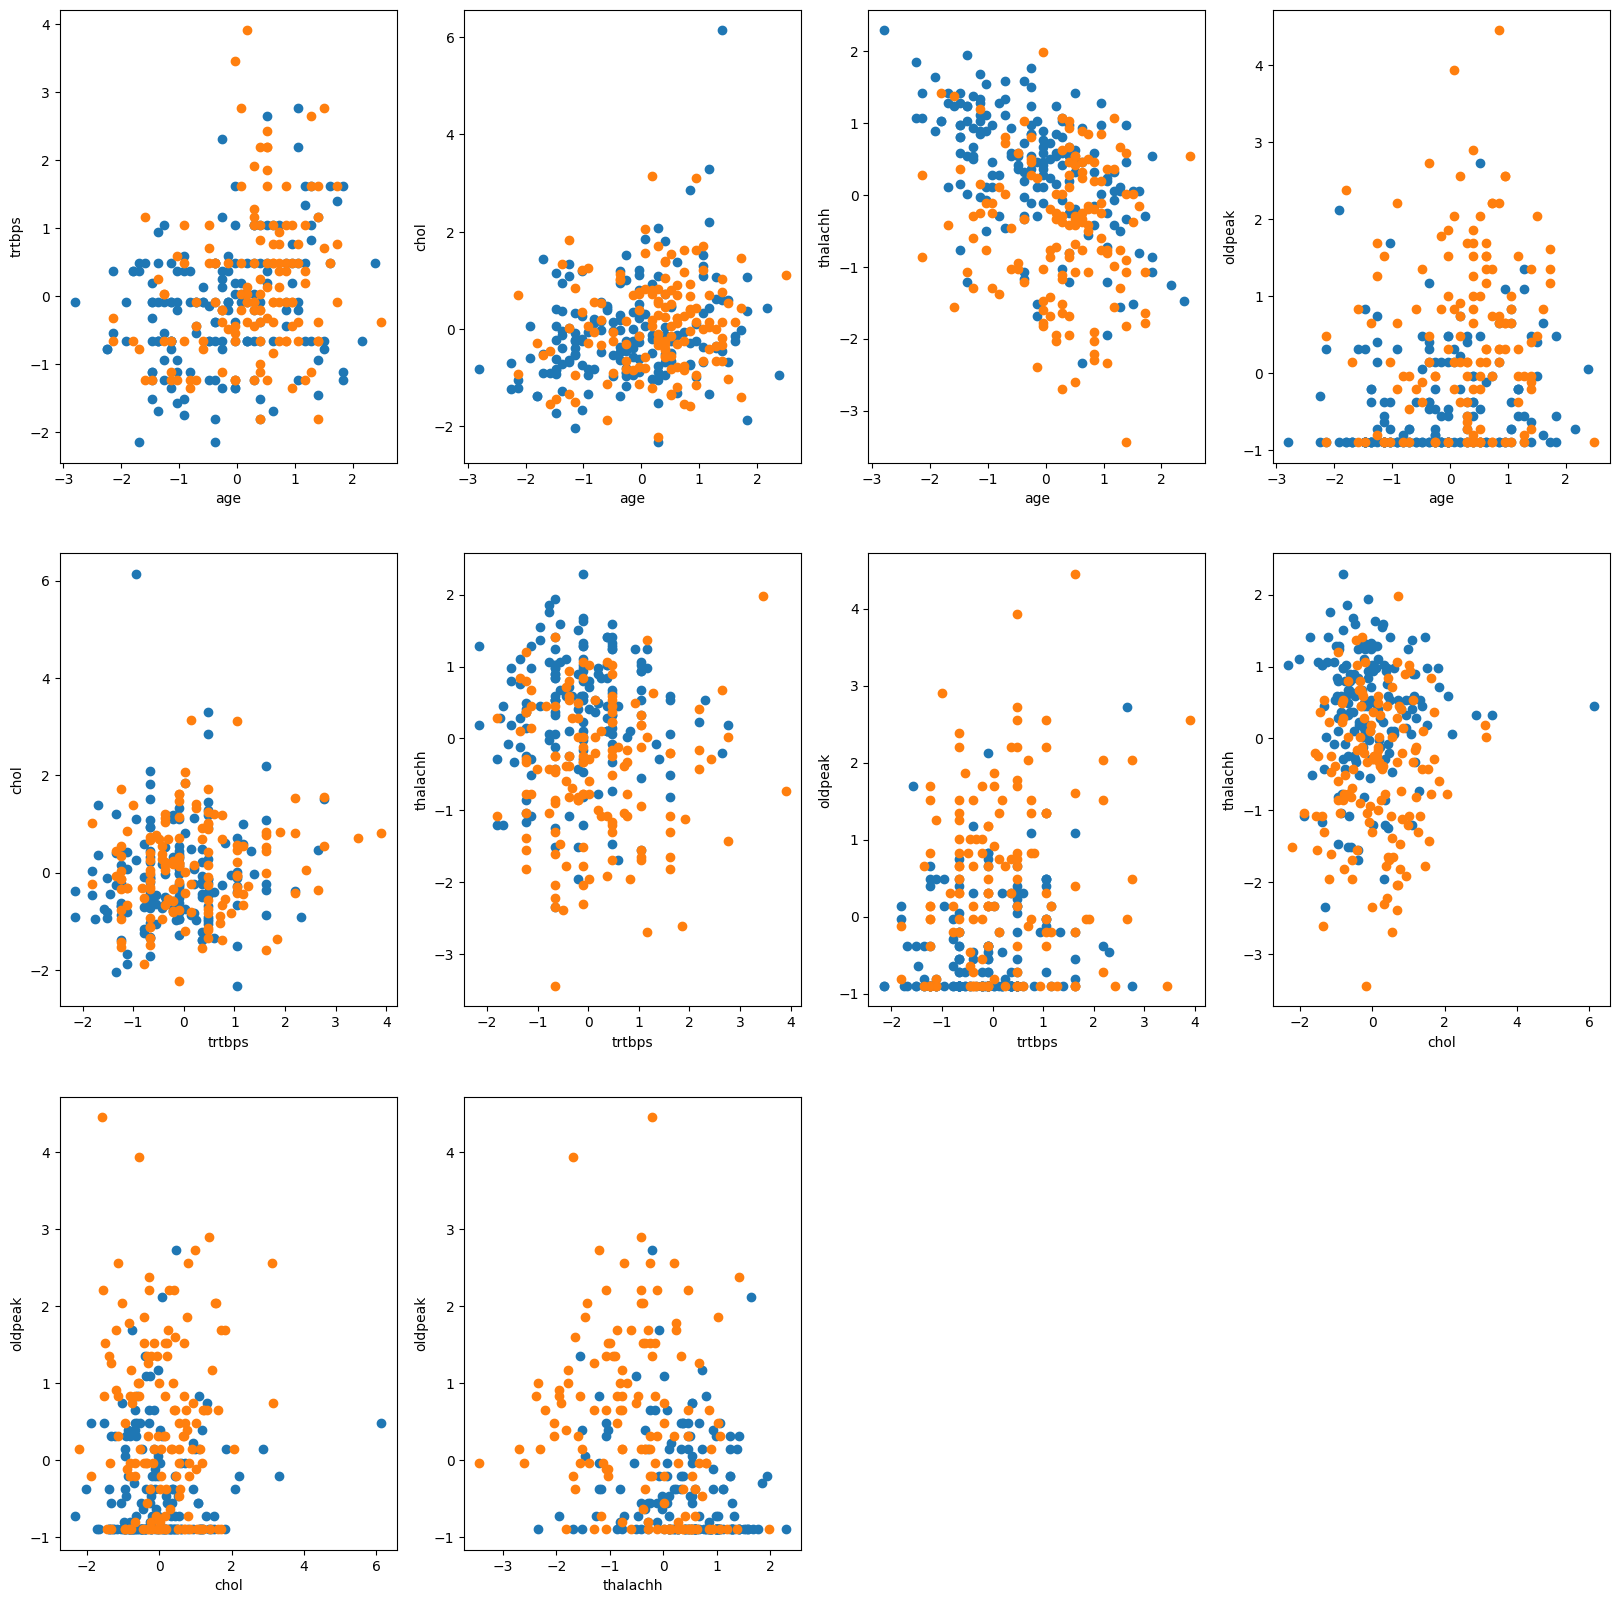

In [60]:
# features with continues value
conts = [0, 3, 4, 7, 9]
# number of loops
maxI = len(conts)

# iterating variable
i = 0
# index at which subplot should be drawn at
n = 0

plt.figure(figsize = (20, 20))

while i<maxI:
    # iterating variable
    j = i + 1
    
    while j<maxI:
        n += 1

        # condition in which filter 1 form 0
        msk = (y == 1)
        msk = msk.reshape(1, -1)[0]
        
        # independent and dependent plot vars
        ind = x[:, conts[i]]
        de = x[:, conts[j]]

        plt.subplot(3, 4, n)
        plt.scatter(ind[msk], de[msk])
        plt.scatter(ind[~msk], de[~msk])
        plt.xlabel(cols[conts[i]])
        plt.ylabel(cols[conts[j]])
        j += 1

    i += 1

## Decision Tree Classifier
From problem description i guess that best model is decision tree classifier. To put hypotisis in test i do experience and then visulize it using 
built in functions. Tree is very deep and has so many leaf it is obvious that i've commited overfitting in my work.<br>
Back into the model initilaizing and using diffrent features as max_depth, min_weight_fraction_leaf and min_impurity_ecrease try to more generlize it.<br>
After training with optimum values i validate it using diffrent methods of validation like accuracy_score which simply shows how many predicts are true out of all predictions to f1_score which is based on precision and recall. In this senario we have almost uniform distrbution of data over 0 and 1 labels so accuracy_score is pretty valid. At other hand not recognizing persons with heart attack potential will make huge diffrence to making mistake in opposite side. This will make f1_score as important as the other.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# clf = DecisionTreeClassifier(random_state=0, min_weight_fraction_leaf=0.05)
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
# clf = DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.1)
scores = cross_val_score(clf, x, y, cv=10)
print(np.mean(scores))

0.8080645161290322


In [12]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score


clf.fit(x_train, y_train)
f1_score(y_test, clf.predict(x_test), average='weighted')
# jaccard_score(y_test, clf.predict(x_test))


0.8115883627434782

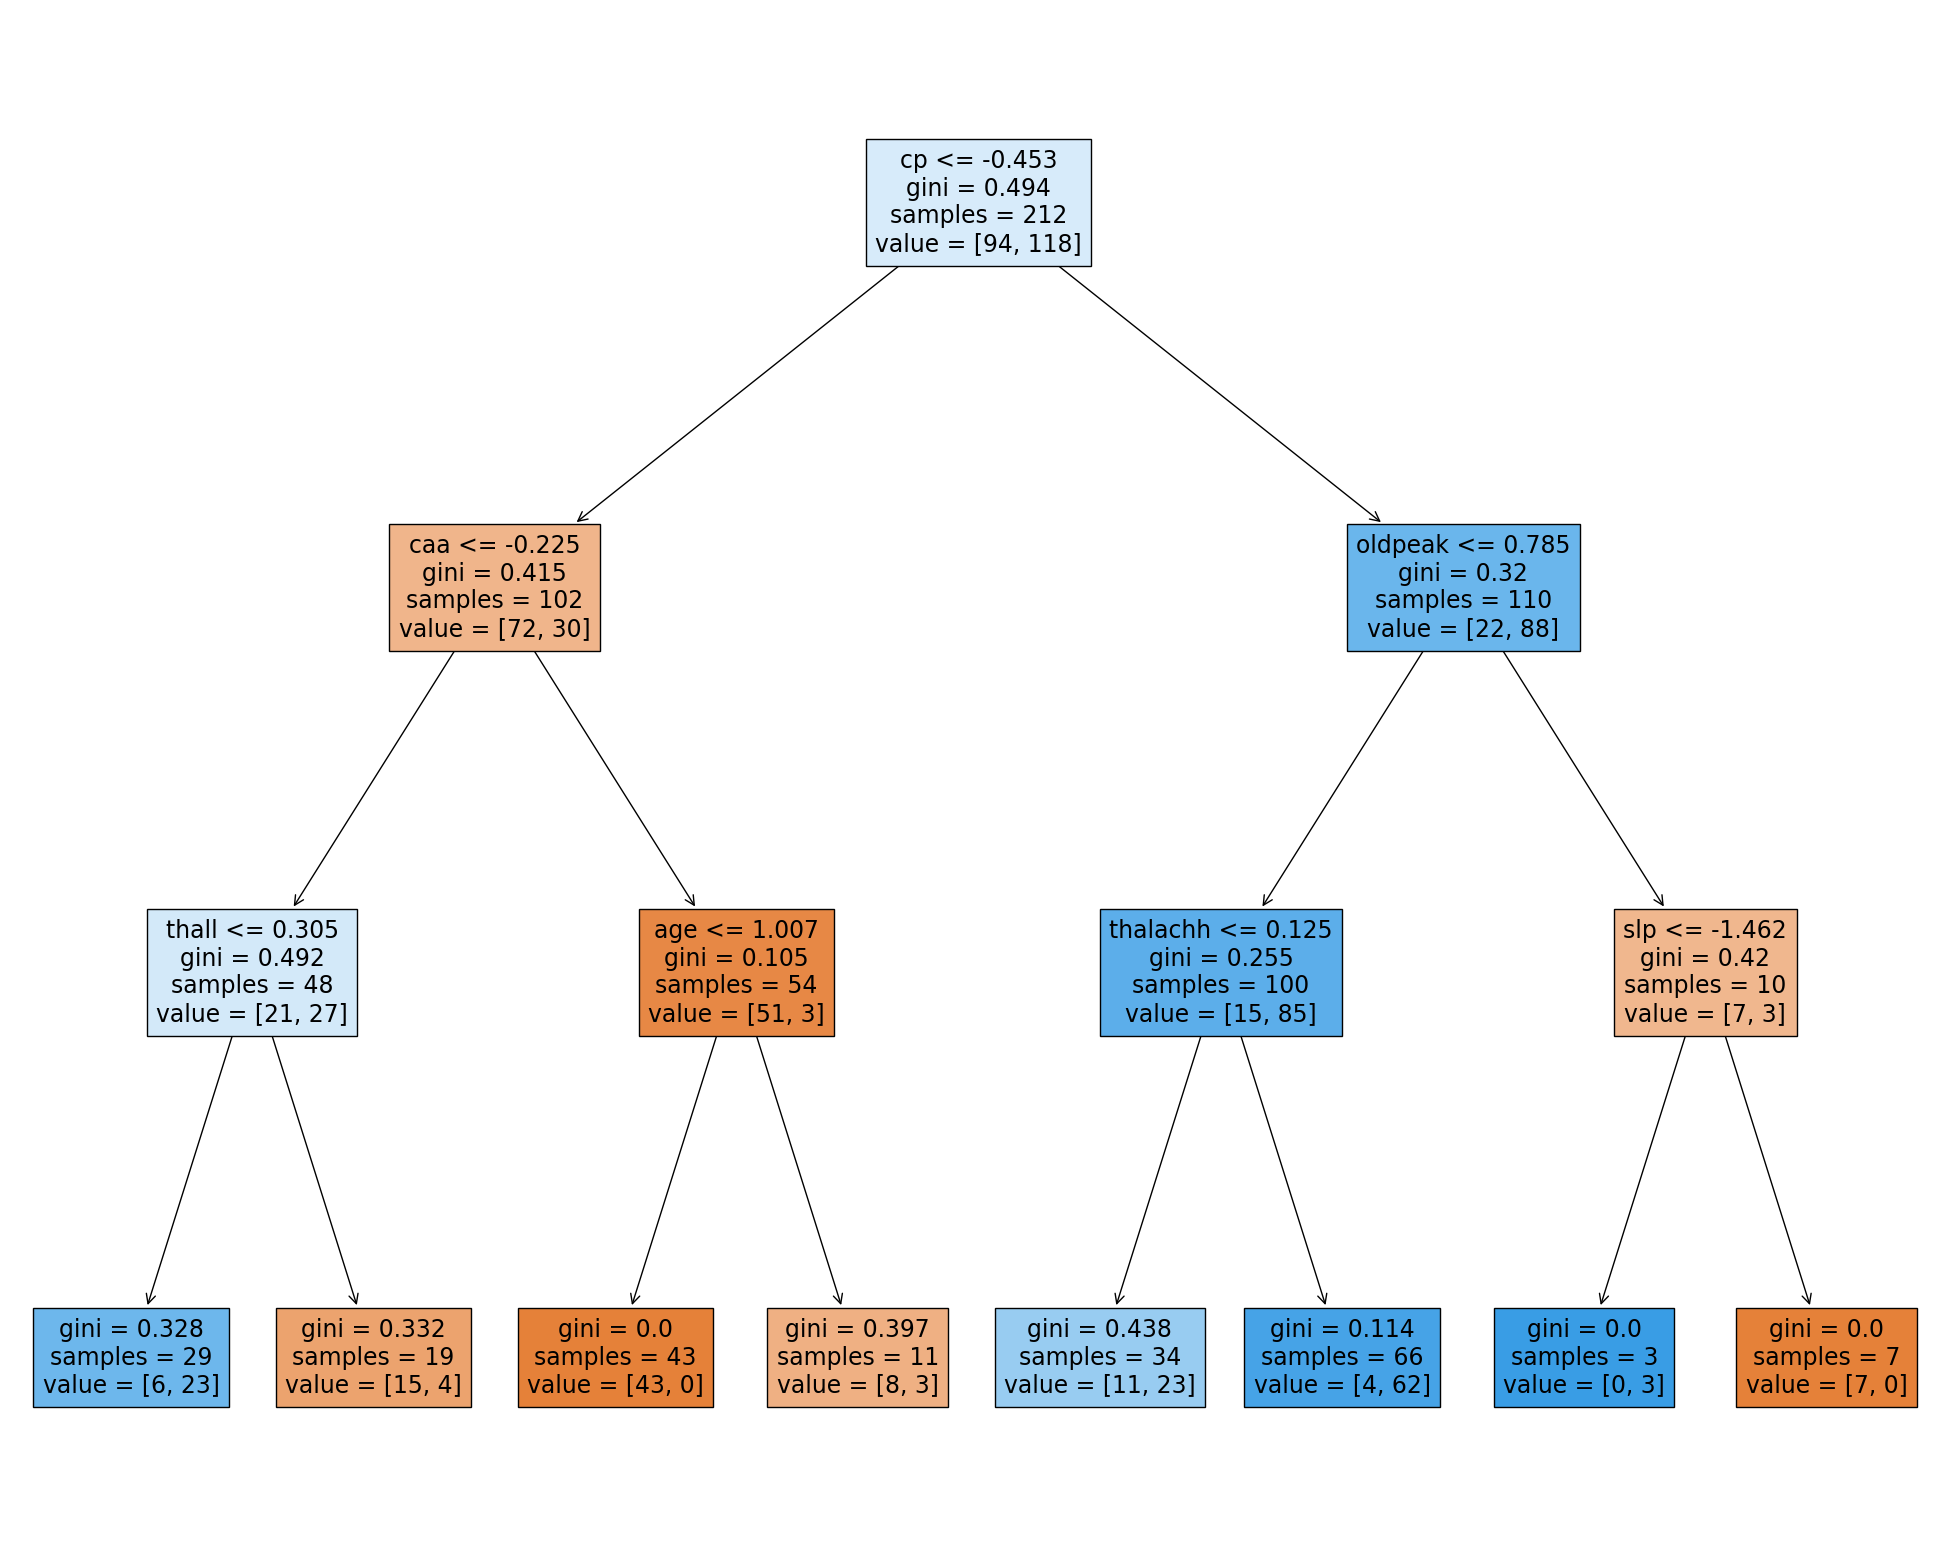

In [7]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot_data = StringIO()
filename = 'heartTree.png'
featureNames = cols[:len(cols)-1]
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=featureNames,
                   filled=True)
# plt.savefig(filename)

## Logestic Regression
Logestic regression also is an usefull model in this case. Because it can produce probalbility of a person getting heart attack from features.<br>
There are several things that manipulating them will result in better or worse performance of model. Inculding "C" which is a regulization variable. Default value of C=1 and lower value indicates more power for regulization, "t" is tresh hold at which probalblities lower than t will be considered 0 and bigger will be set to 1.<br>
Beside accuracy_score and f1, there is another scoring function name log_loss which is base on probability and its distance to real world value. I made to list for diffrent t and c and calculate diffrent scores. Right plot shows score changes per c. Minimum value of diffrent scorings are quit close togheter so i prefer f1_score which pronunce on not beeing wrong on 0 values.<br>
Left hand side is score changes per tresh hold. Cause log_loss function is based on continuse values diffrent ts will not change it. Like before maximum points are close together.

score: 0.8461538461538461 f1-score: 0.851063829787234 log_los: 0.49576853129031495 with c: 0.01 with t: 0.58


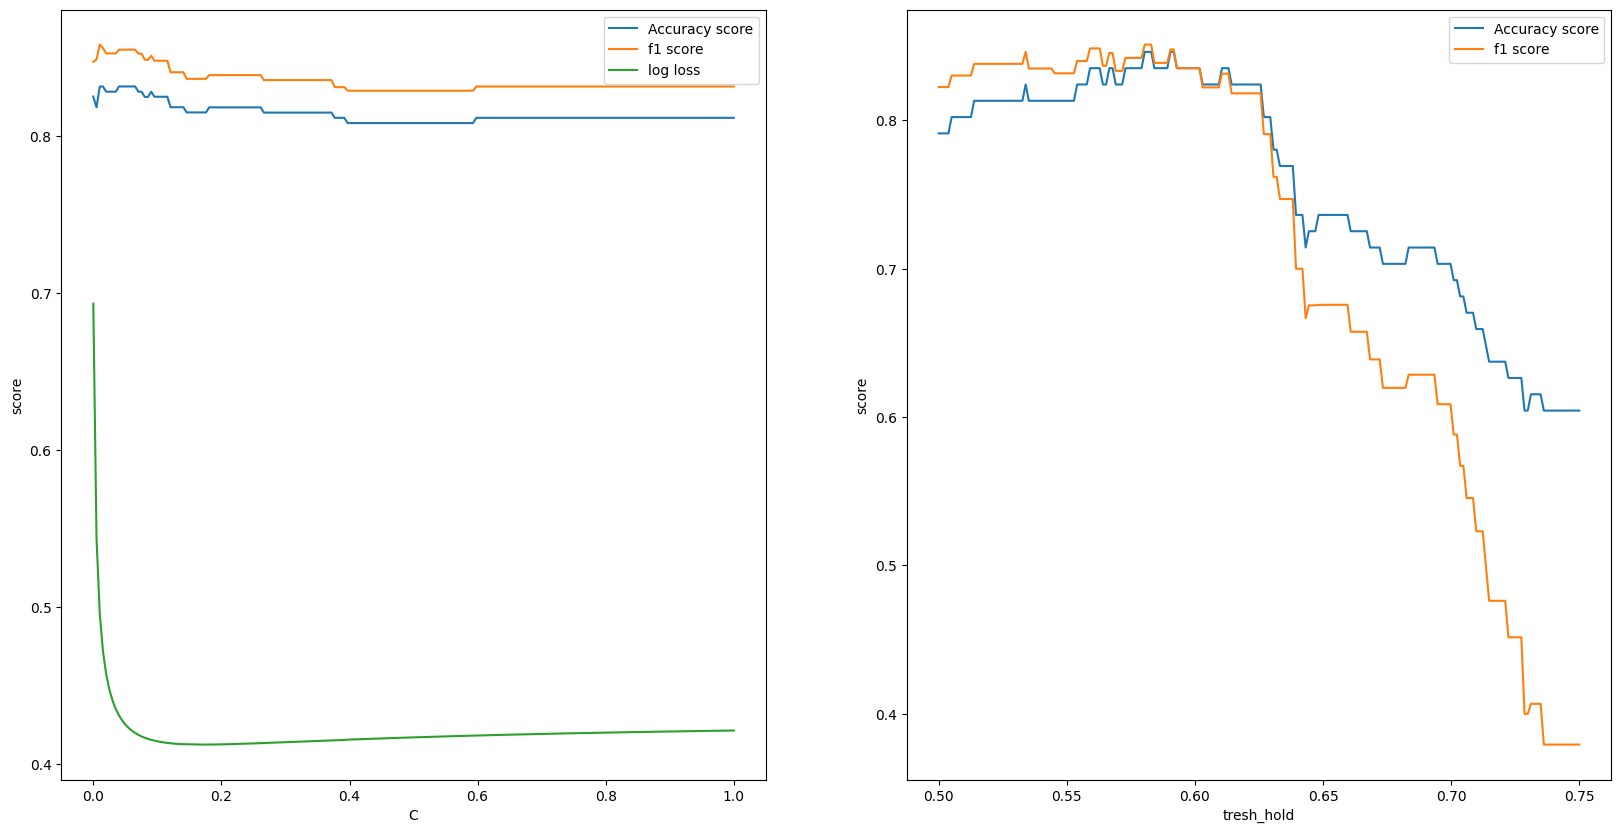

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

plt.figure(figsize = (20, 10))

# smallest value defined in numpy
epsilon = np.finfo(float).eps
# 0 cause error in LR
cs = np.linspace(0+epsilon, 1, 200)
# first interval was [0,1] but after an experience i choose [0.5,0.75] 
tresh_holds = np.linspace(0.5, 0.75, 200)


# diffrent scores will save in desired list
scores = []
fScores = []
logScores = []


# Looping throw C values
for c in cs:
    LR = LogisticRegression(random_state = 0, C=c)

    score = cross_val_score(LR, x, y, cv=10)
    scores.append(np.mean(score))

    # "scoring = 'f1'" indicates scoring of cross validation
    fS = cross_val_score(LR, x, y, cv=10, scoring = 'f1')
    fScores.append(np.mean(fS))


    LR.fit(x_train, y_train)
    score = log_loss(y_test, LR.predict_proba(x_test))
    logScores.append(score)
    


# maxC with diffrent scores has been drawn
maxC = cs[fScores.index(max(fScores))]
# maxC = cs[logScores.index(min(logScores))]


# scoring verses Cs
plt.subplot(1, 2, 1)
plt.plot(cs, np.asarray(scores))
plt.plot(cs, np.asarray(fScores))
plt.plot(cs, np.asarray(logScores))
plt.legend(['Accuracy score', 'f1 score', 'log loss'])
plt.xlabel('C')
plt.ylabel('score')

# Reseting scores to none
scores = []
fScores = []

# Ploting throw different tresh holds
for t in tresh_holds:
    LR = LogisticRegression(random_state = 0, C=maxC)

    LR.fit(x_train, y_train)
    score = accuracy_score(y_test, LR.predict_proba(x_test)[:, 1] >= t)
    scores.append(np.mean(score))
    
    fS = f1_score(y_test, LR.predict_proba(x_test)[:, 1] >= t)
    fScores.append(np.mean(fS))



maxT = tresh_holds[fScores.index(max(fScores))]


# Scoring verses ts
plt.subplot(1, 2, 2)
plt.plot(tresh_holds, np.asarray(scores))
plt.plot(tresh_holds, np.asarray(fScores))
plt.legend(['Accuracy score', 'f1 score'])
plt.xlabel('tresh_hold')
plt.ylabel('score')   


# Training model based on best results C and t
LR = LogisticRegression(random_state = 0, C=maxC)
LR.fit(x_train, y_train)


# Draiving score values
FS = f1_score(y_test, LR.predict_proba(x_test)[:, 1] >= maxT)
S = accuracy_score(y_test, LR.predict_proba(x_test)[:, 1] >= maxT)
logS = log_loss(y_test, LR.predict_proba(x_test))

print(f'score: {S} f1-score: {FS} log_los: {logS} with c: {np.round(maxC, 3)} with t: {np.round(maxT, 3)}')

## KNeighbors
Only value that it changes will effect model is k which i loop throw it.

maximum score: 0.8381720430107528 maximum f1-score: 0.8633218175013841 with k: 17


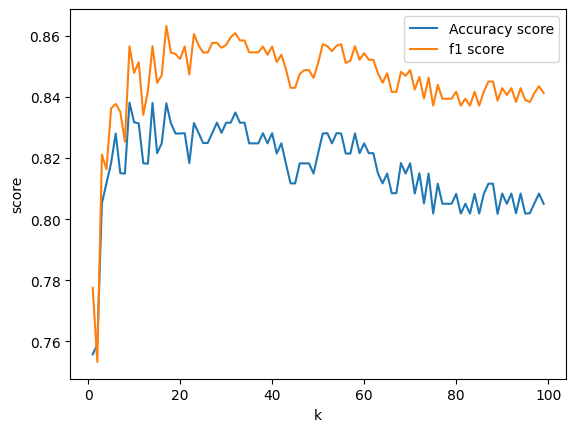

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

# This function makes numpy array with integer values
ks = np.arange(1, 100)

# fscore and accuracy_scores will save
scores = []
fScores = []

# Loop 
for k in ks:
    neigh = KNeighborsClassifier(n_neighbors=k)
    
    score = cross_val_score(neigh, x, np.ravel(y), cv=10)
    scores.append(np.mean(score))

    score = cross_val_score(neigh, x, np.ravel(y), cv=10, scoring = 'f1')
    fScores.append(np.mean(score))


# Plot
plt.plot(ks, np.asarray(scores))
plt.plot(ks, np.asarray(fScores))
plt.legend(['Accuracy score', 'f1 score'])
plt.xlabel('k')
plt.ylabel('score')

# max scores
maxS = max(scores)
maxFS = max(fScores)
maxK = ks[fScores.index(max(fScores))]

# train and fit
neigh = KNeighborsClassifier(n_neighbors=maxK)
neigh.fit(x_train, y_train)

print(f'maximum score: {maxS} maximum f1-score: {maxFS} with k: {maxK}')

## Suport Vector Machines
Different kernels used and sigmoid was the best one of all.

In [9]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


svmClf = svm.SVC(kernel = 'sigmoid', C = 0.1)
score = cross_val_score(svmClf, x, y, cv=10, scoring = 'f1')

svmClf.fit(x_train, y_train)

print(np.mean(score))

0.8592745997622158


## Confusion Matrix

<Figure size 1000x1000 with 0 Axes>

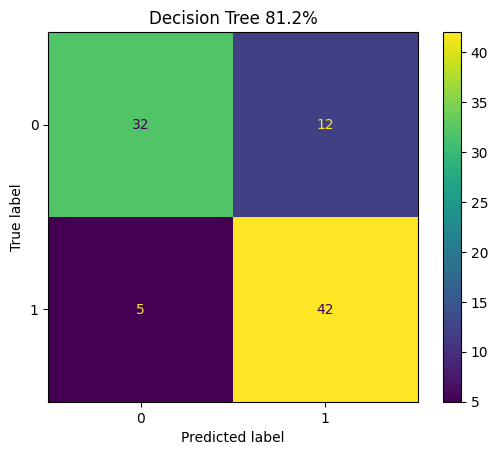

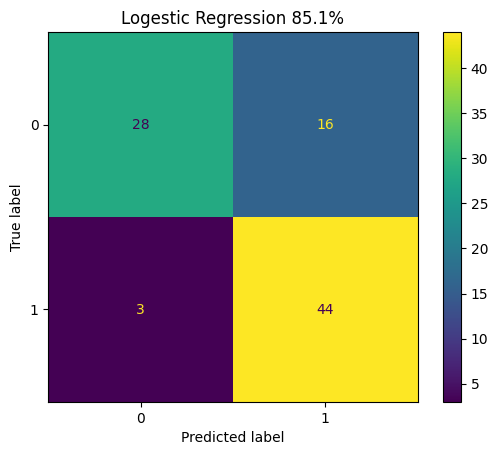

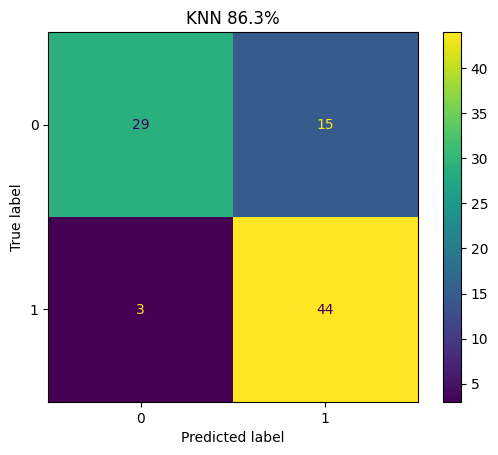

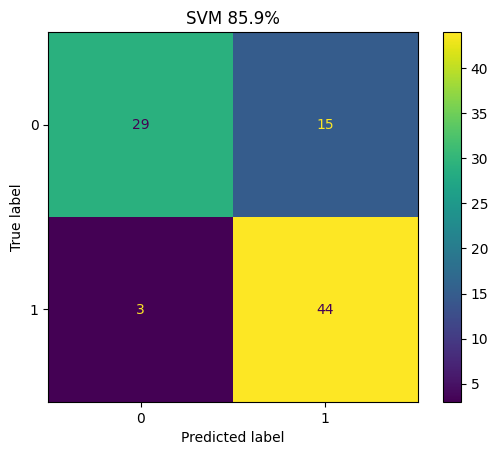

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

models = [clf, LR, neigh, svmClf]
names = ['Decision Tree', 'Logestic Regression', 'KNN', 'SVM']
scores = [0.812, 0.851, 0.863, 0.859]
cs = []
i = 0

plt.figure(figsize = (10, 10))

for mod in models:
    c_matrix = confusion_matrix(y_test, mod.predict(x_test))
    cm_displayer = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [0, 1])

    cm_displayer.plot()
    plt.title(f'{names[i]} {scores[i]*100}%')

    i += 1

plt.show()

## Conclusion
Based on f1_score results and confusion matrix we can see that score of models are very close toghter models form best to worst based on score are KNeighbors, SVM, LR and Decision Tree.<br>
Most number of wrong label 1 predictions is also for Decision Tree with 5. For other models it's equal to 3. LR with 16 wrong label 0 predictions has 1 one more week performance than other two. Interstingly for kneighbors and svm confusion matrixes are completly similar. So we can say Kneigh model is best model to solve this problem 86% performance.